Masterthesis

In [126]:
# load modules
import random
import matplotlib.pyplot as plt

Set up an initial population of individuals with a predetermined number of chromosomes (ploidy_number) and loci per chromosomes (loci_number)

In [127]:
def initialize_population(initial_size:int,ploidy_number:int,loci_number:int):
    """_summary_
    Initialize the starting population with a given number of individuals of the population (initial_size), with its ploidy level(ploidy_number)
    and number of loci per chromosome (loci_number)
    Args:
        initial_size (int): Size of the initial population of individuals to start with
        ploidy_number (int): Number of chromosome sets per individual
        loci_number (int): Number of loci per chromosome

    Returns:
        List of lists which represents the population with its individuals based on the given parameters
    """
    population = []
    for i in range(0, initial_size):
        individual = []
        for i in range(0, ploidy_number):
            chromosome_set = []
            for i in range(0, loci_number):
                chromosome_set.append(random.choice([0,1]))
            individual.append(chromosome_set)
        population.append(individual)
    return population
print(initialize_population(5,2,2))

[[[0, 1], [0, 1]], [[1, 0], [0, 0]], [[1, 1], [1, 0]], [[0, 1], [0, 1]], [[0, 0], [0, 0]]]


Process of meiosis.

In this function meiosis has been programmed. During meiosis 2 individuals will be sampled from a population of individuals which contains diploids, triploids and tetraploids. For each of these individuals a certain amount of chromosomes will be selected to be present in the gametes which will create the following generation. 

If the sampled individual is diploid either 1 of the chromosomes will be selected with equal probability which will lead to reduced gametes or 2 chromosomes will be selected (unreduced gametes) according a probability 1-v for reduced gametes and v for unreduced gametes.

In the case that the individual is triploid we would have to take into account a fertility factor 𝜑 which is computed to be 0.30 (Schemske). This is done by generating a random number from an uniform distribution between 0 and 1, in the case that this generated number is less then  𝜑 the triploid can succesfully form gametes otherwise the triploid will not form gametes. When the triploid is able to form gametes there is 25% chance that only one chromosome is selected which would result in a haploid gamete, 25% that 2 chromsomes are selected which results in diploid gametes and 50% chance that 3 chromsomes are selected which results in triploid gametes 

In the case that the selected individual is tetraploid there is a 1-v probability that diploid gametes will be produced and no gametes will be produced with probability v. This is implemented such that the tetraploid individuals will have not fitness advantage for tetraploids over diploids

Other rules were set in place, which state that when we would generate offspring with more then 4 chromosomes 2 new individuals will be chosen for a new round of meiosis and that wehn 1 or 2 individuals would not produce gametes mating fails and new individuals should be randomly chosen for the next round of meiosis


In [128]:
def meiosis(arg,v,f):
    gametes = []
    if len(arg) == 2:  
        chromosomes = random.choices([1,2],weights=(1-v,v),k=1) # choice for reduced or unreduced gametes
        if chromosomes[0] == 1:
            gametes.append(random.sample(arg,1)[0])
        else:
            gametes.append(arg[0])
            gametes.append(arg[1])
    elif len(arg) == 3 and random.uniform(0,1) < f:
        chromosomes = random.choices([1,2,3],weights=(0.25,0.25,0.50),k=1) # 1 represents haploid, 2 diploid and 3 triploid (optional)
        poss_gametes = random.sample(arg,chromosomes[0])
        if chromosomes[0] == 1:
            gametes.append(poss_gametes[0])
        elif chromosomes[0] == 2:
            gametes.append(poss_gametes[0])
            gametes.append(poss_gametes[1])
        elif chromosomes[0] == 3:
            gametes.append(poss_gametes[0])
            gametes.append(poss_gametes[1])
            gametes.append(poss_gametes[2])
    elif len(arg) == 4:
        chromosomes = random.choices([1,2],weights=(1-v,v),k=1) # choice for diploid gametes or no gametes
        print(chromosomes)  
        if chromosomes[0] == 1:
            poss_gametes = random.sample(arg,2)
            gametes.append(poss_gametes[0])
            gametes.append(poss_gametes[1])
     
    return gametes

The following cells describes the process of recombination, in which recombination will be performed with a predtermined frequency. During recombination each time a chromosome is chosen from one parental individual to perform crossover with a chromosome of the other parental individual.

In [129]:
# recombination function
import random

def choose_random_chromo(individual):
    random_index = random.randint(0, len(individual) - 1)
    chosen_chromo = individual[random_index]
    remaining = [chromo for idx, chromo in enumerate(individual) if idx != random_index]
    return chosen_chromo,remaining

def recombination(individual, recombination_frequency = 0.3, length = 2):
    individual = sorted(individual, key=len, reverse=True) # sort individual so first chromosome set is always longest
    recombinated_individual = []
    # case of 1 x 1
    if (random.uniform(0,1) > recombination_frequency):
        random_index = random.randint(1,length -1)
        if len(individual[0]) == 1 and len(individual[1]) == 1:
            chromo_1 = individual[0]
            chromo_2 = individual[1]
            recombinated_chromo_1 = chromo_1[0][:random_index] + chromo_2[0][random_index:]
            recombinated_chromo_2 = chromo_2[0][:random_index] + chromo_1[0][random_index:]
            recombinated_individual = [recombinated_chromo_1] + [recombinated_chromo_2]
        # case of 2 x 1
        if len(individual[0]) == 2 and len(individual[1]) == 1:
            chromo_1, remaining_chromo1 = choose_random_chromo(individual[0])    
            chromo_2 = random.choice(individual[1]) # choose 1 chromsome from other set                 
            recombinated_chromo_1 = chromo_1[:random_index] + chromo_2[random_index:]               
            recombinated_chromo_2 = chromo_2[:random_index] + chromo_1[random_index:]               
            recombinated_individual = [recombinated_chromo_1] + remaining_chromo1 + [recombinated_chromo_2]                                           
        # case of 2 x 2
        if len(individual[0]) == 2 and len(individual[1]) == 2:
            chromo_1, remaining_chromo1 = choose_random_chromo(individual[0])          
            chromo_2, remaining_chromo2 = choose_random_chromo(individual[1])          # ['B', 'B']
            recombinated_chromo_1 = chromo_1[:random_index] + chromo_2[random_index:]               # ['A', 'b']
            recombinated_chromo_2 = chromo_2[:random_index] + chromo_1[random_index:]               # ['b', 'A']
            recombinated_individual = [recombinated_chromo_1] + remaining_chromo1 + [recombinated_chromo_2] + remaining_chromo2
        # case of 3 x 1
        if len(individual[0]) == 3 and len(individual[1]) == 1:
            chromo_1, remaining_chromo1 = choose_random_chromo(individual[0])           
            chromo_2 = random.choice(individual[1]) # choose 1 chromsome from other set                         
            recombinated_chromo_1 = chromo_1[:random_index] + chromo_2[random_index:]               
            recombinated_chromo_2 = chromo_2[:random_index] + chromo_1[random_index:]
            recombinated_individual = [recombinated_chromo_1] + remaining_chromo1 + [recombinated_chromo_2]
    else: 
        recombinated_individual = individual
    return recombinated_individual


Cytoptype dynamics model that starts with an initial population of individuals that will study how the frequency of diploids, triploids and tetraploids will change after a certain number of generations. Per generation 2 by 2 individuals will be chosen to undergo meisosis and form a future generation.This future generation will be used to update our initial population until the number of offspring reaches the original population size. 

In [130]:
def cytotype_dynamics(initial_size:int,ploidy_number:int,loci_number:int,max_generations:int,v:float,f:float,reps:int):
    diploids = []
    triploids = []
    tetraploids = []
    for i in range(0,reps):
        initial_population = initialize_population(initial_size,loci_number,ploidy_number) # na each rep opnieuw initialpop opstarten ==> dus een nieuwe onafhankelijke trials
        t = 1
        n = len(initial_population)
        freq_diploid, freq_triploid, freq_tetraploid = [1], [0], [0]

        new_pop = initial_population
        while t < max_generations:
            offsprings = []
            while len(offsprings) < n:
                Indexe1 = random.randint(0, initial_size-1)
                Indexe = random.randint(0, initial_size-1)
                
                pair1 = new_pop[Indexe1]
                pair2 = new_pop[Indexe]
                first = meiosis(pair1,v,f)
                second = meiosis(pair2,v,f)
                if t == 1:
                    print(first, second)
                if first != [] and second != [] and len(first + second) < 5:
                    #offspring = recombination([first] + [second])
                    offspring = [first, second]
                    
                    offsprings.append(offspring)
                    
            new_pop = offsprings
            freq_diploid.append(sum(1 for individual in new_pop if len(individual) == 2)/len(new_pop)) # count how many diploids in each generation
            freq_triploid.append(sum(1 for individual in new_pop if len(individual) == 3)/len(new_pop)) # count how many triploids in each generation
            freq_tetraploid.append(sum(1 for individual in new_pop if len(individual) == 4)/len(new_pop)) # count how many tetraploids in each generation
            t += 1
            
        diploids.append(freq_diploid)
        triploids.append(freq_triploid)
        tetraploids.append(freq_tetraploid)
        
    mean_diploids = get_mean_of_freq_overreps(diploids,reps)
    mean_triploids = get_mean_of_freq_overreps(triploids,reps)
    mean_tetraploids = get_mean_of_freq_overreps(tetraploids,reps)
    return max_generations,mean_diploids,mean_triploids,mean_tetraploids,diploids,triploids,tetraploids

def get_mean_of_freq_overreps(data,reps):

    mean_values = [0] * len(data[0])
    for rep in data:
        for i, value in enumerate(rep):
            mean_values[i] += value
    mean_values = [(value/reps) for value in mean_values]
    return mean_values

Recursive non-linear equations describing the cytotype_dynamics model represents stochastic individual simulations

In [131]:
def recursive_NL_equations(max_generations,v,f,d1,d2,d3):
    # Initial conditions
    x2 = 1  # represent frequencies of diploid
    x3 = 0  # represent frequencies of triploid
    x4 = 0  # represent frequencies of tetraploid
    x2_list = [1]
    x3_list = [0]
    x4_list = [0]
    for i in range(max_generations-1):
        # update gamete proportions
        g1 =x2 * (1-v) + d1 * x3 * f
        g2= x2 * v + d2 * x3 * f + x4 * (1-v)
        g3 = d3 * x3 * f
        o = (g1 + g2 + g3)**2
        # update genotype frequencies
        x2 = g1**2 /o
        x3 = 2 * g1 * g2 / o
        x4 = (g2**2 + (2 * g1 * g3)) / o
        x2_list.append(x2)
        x3_list.append(x3)
        x4_list.append(x4)
    return max_generations,x2_list,x3_list,x4_list

[[0, 0]] [[1, 1]]
[[0, 0]] [[0, 1]]
[[0, 1]] [[0, 0]]
[[1, 0]] [[1, 1]]
[[1, 1]] [[0, 1]]
[[1, 0]] [[0, 1]]
[[0, 1]] [[0, 1]]
[[0, 1]] [[0, 1]]
[[0, 0]] [[0, 1]]
[[0, 1]] [[0, 1]]
[[0, 1]] [[0, 0]]
[[0, 1], [0, 1]] [[1, 1]]
[[1, 0]] [[1, 1]]
[[1, 0]] [[0, 1]]
[[0, 1]] [[1, 1]]
[[0, 1]] [[1, 0]]
[[0, 1]] [[1, 0]]
[[0, 0]] [[1, 0]]
[[0, 0]] [[1, 1]]
[[0, 0]] [[0, 0]]
[[1, 1]] [[0, 1]]
[[0, 0]] [[1, 0]]
[[1, 1]] [[1, 1]]
[[1, 0]] [[1, 0]]
[[1, 1]] [[1, 0]]
[[1, 1]] [[1, 0]]
[[1, 1]] [[0, 1]]
[[0, 0]] [[0, 0]]
[[0, 0]] [[1, 0]]
[[0, 1]] [[0, 1]]
[[0, 1]] [[1, 1]]
[[0, 0]] [[0, 1]]
[[1, 1]] [[1, 0]]
[[1, 1]] [[0, 1]]
[[0, 1]] [[0, 0]]
[[0, 0]] [[0, 0]]
[[1, 1]] [[1, 0]]
[[0, 0]] [[1, 0]]
[[1, 1]] [[0, 1]]
[[0, 0]] [[1, 0]]
[[1, 1]] [[1, 1]]
[[1, 1]] [[1, 0]]
[[1, 0]] [[0, 0]]
[[1, 0]] [[1, 1]]
[[0, 1]] [[1, 1]]
[[1, 0]] [[1, 1]]
[[1, 0]] [[1, 1]]
[[0, 0]] [[1, 0], [0, 1]]
[[0, 0]] [[0, 0]]
[[1, 1]] [[0, 0]]
[[1, 0]] [[0, 0]]
[[0, 1]] [[0, 1]]
[[0, 1]] [[1, 0]]
[[0, 1]] [[0, 1]]
[[0, 0]] [[0

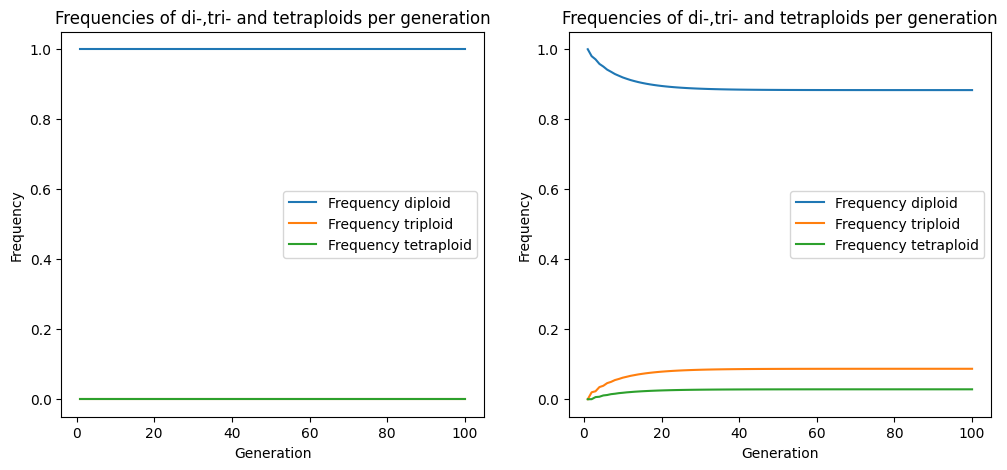

In [132]:
def makeplot(data,data2):
    t1 = list(range(1,data[0]+1))
    t2 = list(range(1,data2[0]+1))
    plt.figure(figsize=(12, 5))

    plt.subplot(1,2,1)
    plt.plot(t1,data[1], label= "Frequency diploid")
    plt.plot(t1,data[2], label= "Frequency triploid")
    plt.plot(t1,data[3], label= "Frequency tetraploid")
    plt.xlabel("Generation")
    plt.ylabel("Frequency")
    plt.title("Frequencies of di-,tri- and tetraploids per generation")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(t2,data2[1], label= "Frequency diploid")
    plt.plot(t2,data2[2], label= "Frequency triploid")
    plt.plot(t2,data2[3], label= "Frequency tetraploid")
    plt.xlabel("Generation")
    plt.ylabel("Frequency")
    plt.title("Frequencies of di-,tri- and tetraploids per generation")
    plt.legend()
    plt.show()

def plot_cytotypespecific_frequencies(data,data2):
    t = list(range(1,data[0]+1))
    t2 = list(range(1,data2[0]+1))
    for rep in data[-3]:
        plt.scatter(t, rep,color="red")
    plt.plot(t2,data[3],color="black")
    plt.grid()
    plt.ylim(0.9, 1)
    plt.xlabel("Generation")
    plt.ylabel("Frequency")
    plt.title("Frequency of Diploids per generation")
    plt.legend()
    plt.show()

makeplot(cytotype_dynamics(100,2,2,100,0.01,0.3,20),recursive_NL_equations(100,0.01,0.3,0.25,0.25,0.5))
#plot_cytotypespecific_frequencies(cytotype_dynamics(100,2,2,100,0.01,0.3,20),recursive_NL_equations(100,0.01,0.3,0.25,0.25,0.5))

In [133]:
# code to make pictures for each unreduced gametes production and fertility rate
# v ==> 1%,2%,4%,6%,8%, 10% 
